## DSCI 100 PROJECT PROPOSAL 
- Bryan Park
- Maysie Feng
- Alice Cao
- Scott Mello (not contributing / can't be reached) 

## INTRODUCTION 

Coronary artery disease (CAD) is one of the most common types of heart diseases in the world. It is usually caused by plaques building up in the arteries wall and affecting regular heart functions. The buildup of plaque can lead to atherosclerosis, which is the narrowing process of the artery walls. 

The symptoms of CAD include chest pain, discomfort in the arms or shoulder, feeling sick to the stomach, or a cold sweat. As time passes, CAD may lead to heart failure, resulting in a serious condition in which the heart cannot pump blood properly. Many risk factors can increase the chance of developing CAD, including unhealthy eating, lack of physical activity, and smoking tobacco. A family history of heart disease could also increase the risk of getting CAD.

The question we will be addressing is **"How can different factors such as age, gender, resting blood pressure and maximum heart rate contribute in the process of diagnosing a patient of heart disease?"** 

The data set we are using is Cadiovascular_Disease_Dataset published on April 16, 2021 from Lincoln University College. The contributors are Bhanu Prakash Doppala and Debnath Bhattecharyya. The dataset was gathered from a multispecialty hospital in India and it contains 1000 subjects with 12 features. It has statsitics on a patients age, gender, cholesterol leveles, heart rate and their final test results. 




## PRELIMINARY EXPLORATORY DATA ANALYSIS

In [97]:
library(tidyverse)
library(tidymodels)
set.seed(1)


In [98]:
#we will first read the data 
heart_disease <- read_csv("data/disease_dataset.csv")

#this will show the first 6 rows of the raw data that we read in 
head(heart_disease)


Rows: 1000 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): patientid, age, gender, chestpain, restingBP, serumcholestrol, fas...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1
148462,24,1,1,173,0,0,0,161,0,4.7,3,2,1


In [99]:
#we will turn the target column as a factor, and rename them as "Positive" and "Negative and store them on a separate column 
heart_disease <- heart_disease |> 
    mutate(test_result = as_factor(target)) |> 
    mutate(test_result = fct_recode(test_result, "Positive" = "1", "Negative" = "0"))

head(heart_disease) 

patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target,test_result
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1,Positive
119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0,Negative
119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0,Negative
132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1,Positive
146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1,Positive
148462,24,1,1,173,0,0,0,161,0,4.7,3,2,1,Positive


In [100]:
#we will only select the variables that we are going to be using as predictors 
heart_disease <- heart_disease |> 
    select(age,serumcholestrol,restingBP,maxheartrate, test_result) |> 
    filter(serumcholestrol != 0) 

#we will split the data set so we can use 75% of the data to train, and the other 25% to actually test. 
heart_disease_split <- initial_split(heart_disease, prop = 0.75, strata = test_result)
heart_disease_train <- training(heart_disease_split)
heart_disease_test <- testing(heart_disease_split)

print("Below is a sample of our training data set") 
head(heart_disease_train)

print("Below is a sample of our testing data set") 
tail(heart_disease_train) 

[1] "Below is a sample of our training data set"


age,serumcholestrol,restingBP,maxheartrate,test_result
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
40,229,94,115,Negative
49,142,133,202,Negative
52,345,127,192,Negative
62,357,121,138,Negative
27,135,129,192,Negative
46,253,198,199,Negative


[1] "Below is a sample of our testing data set"


age,serumcholestrol,restingBP,maxheartrate,test_result
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
58,429,150,168,Positive
33,416,120,153,Positive
30,316,169,109,Positive
48,349,139,183,Positive
69,434,156,196,Positive
45,417,186,117,Positive


We will be training our classification model using 75% of our original dataset. Our response variable will be the test_result, which shows wether the patient was positive or negative for any heart disease. The predictors that we will be using are age, serum cholestrol (which is the total amount of cholestrol in a person's blood), resting blood pressure and maximum heart rate. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


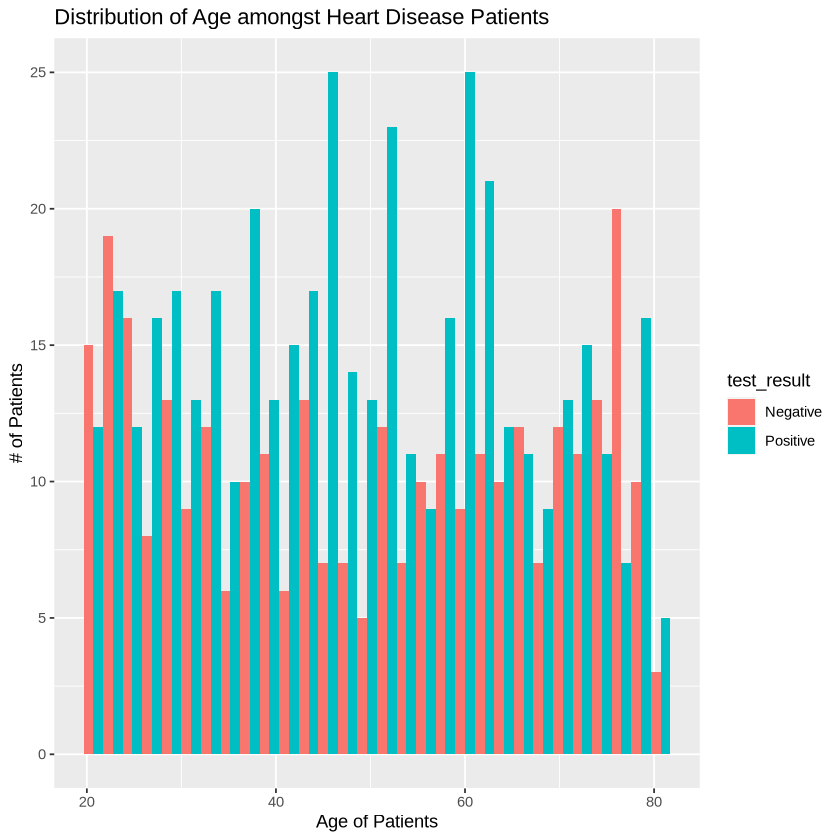

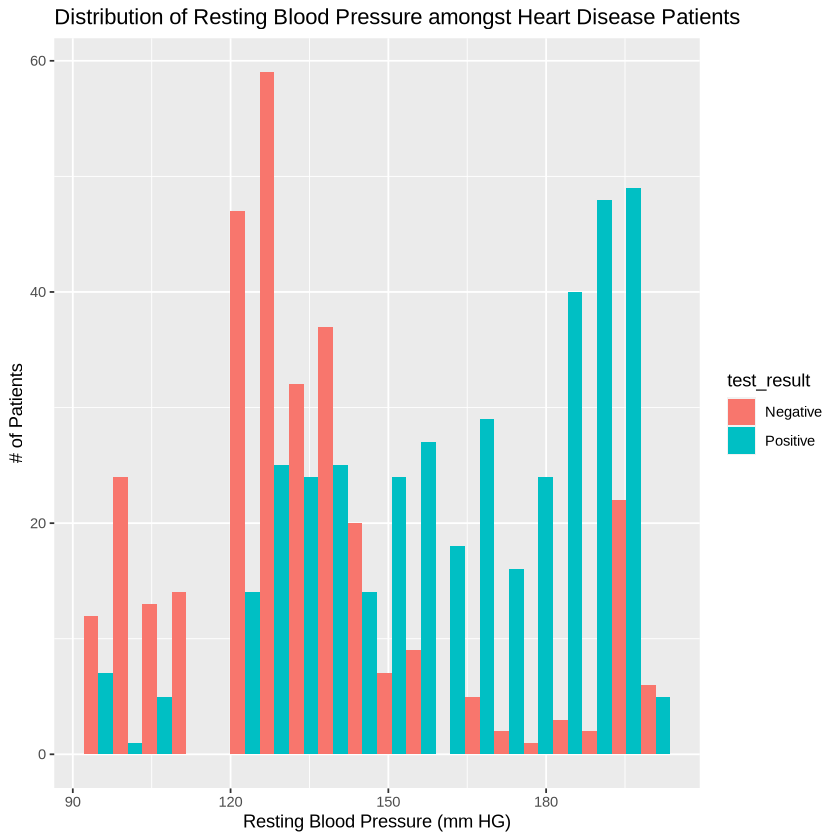

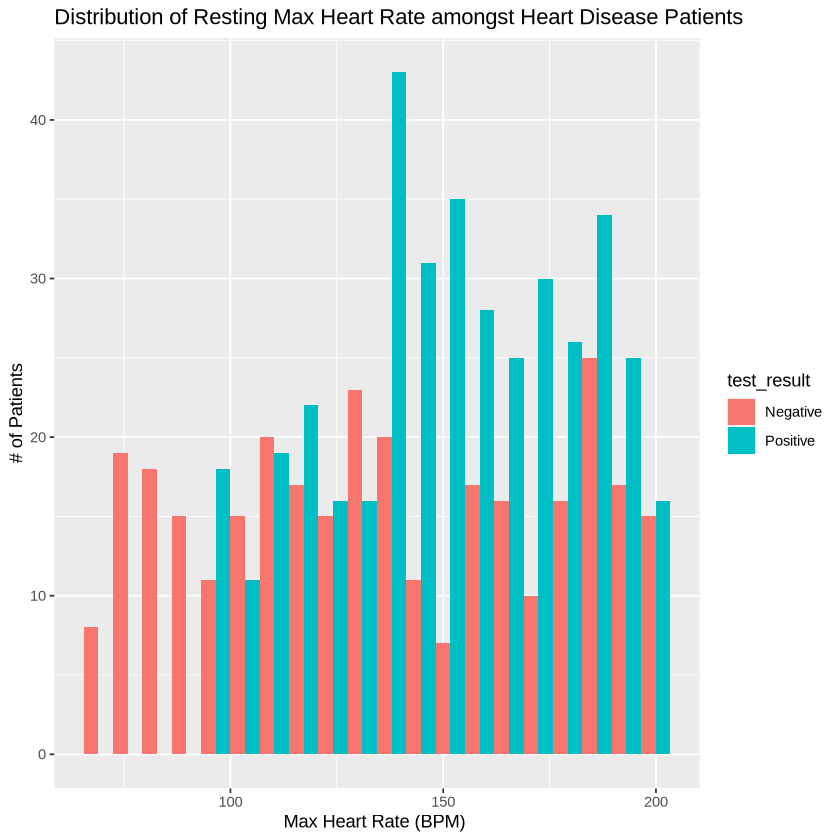

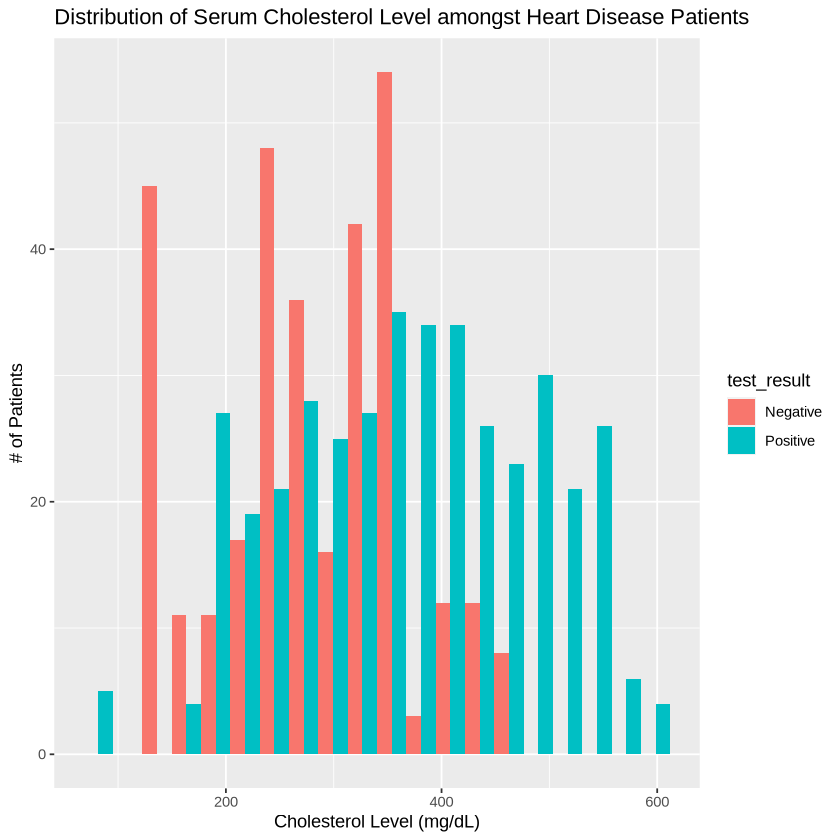

In [101]:


age_hist <- scaled_hd_train |> 
    ggplot(aes(x = age, fill = test_result)) + 
    geom_histogram(position = "dodge", bins = 20) +
    labs(x = "Age of Patients", y = "# of Patients", color = "Test Result", title = "Distribution of Age amongst Heart Disease Patients")


bp_hist <- heart_disease_train |> 
    ggplot(aes(x = restingBP, fill = test_result))+ 
    geom_histogram(position = "dodge", bins = 20) +
    labs(x = "Resting Blood Pressure (mm HG)", y = "# of Patients", color = "Test Result", title = "Distribution of Resting Blood Pressure amongst Heart Disease Patients")


heartrate_hist <- heart_disease_train |> 
    ggplot(aes(x = maxheartrate, fill = test_result))+ 
    geom_histogram(position = "dodge", bins = 20) +
    labs(x = "Max Heart Rate (BPM) ", y = "# of Patients", color = "Test Result", title = "Distribution of Resting Max Heart Rate amongst Heart Disease Patients")

chol_hist <- heart_disease_train |> 
    ggplot(aes(x = serumcholestrol, fill = test_result))+ 
    geom_histogram(position = "dodge", bins = 20) +
    labs(x = "Cholesterol Level (mg/dL)", y = "# of Patients", color = "Test Result", title = "Distribution of Serum Cholesterol Level amongst Heart Disease Patients")


sample_plot
bp_hist
heartrate_hist
chol_hist


## Methods 

To perform our research, we will be using the classification method learned in class. We will be using four different predictors (age, cholestrol level, resting blood pressure, and maximum heart rate) to predict a new patient's final test result. Before we do any classification procedures, we will scale all the predictors so that all of the factors have an "even say" during the classification process. Without this step, the age variable will get overshadowed by the other predictors due to its lower range of values. After the scaling procedure, we can then create scatter plots, comparing the different predictors on even footing, and coloring the scatter plots accordingly to the obesrvation's test result. A correct implementation of scaling and plotting will allow us to use the K-nearest neighbors classification algorithm to predict the test result of a new patient. 

## Expected outcomes and significance:


From our preliminary exploratory data analysis and also our pre-existing knowledge about heart disease, we expect patients that are older to have a higher chance of being diagnosed with heart disease. On top of that, our preliminary data analysis showed us that patients with a higher resting blood pressure (above 150 mmHG), higher maximum heart rate (above 150 bpm) and a higher chlesterol level (above 400 mg/dL) are more likely to be diagnosed with a positive heart disease check. 

If our expected outcome eventually meets with the statistical data, such findings will facilitate medical workers to better diagnose patients with heart diseases. They will be able to diagnose patients more accurately and efficiently based on the four different factors that we used.

The outcome of our research could pose further questions about habits that could lead to maintaining a healthy life style to prevent heart disease. Examples of such questions could be : 

- How does one maintain a lower maximum heart rate? Does nutrition play any part in this?
- What are some healthy habits that could lead to a lower choelstrol level.
- What actions/activities are recommended to older people in order to decrease the likelihood of having heart disease?

It could also raise a set of more scientific and medical questions, such as : 

- Which predictor has the stronges correlation between heart disease and itself?
- What other factors could increase the likelihood of heart disease?
- What is so different between younger and older people that increase the likelihood of heart disease? 
